#### This is one of the basic dataset that almost all the people in the field of Machine Learning have used to practice their skill and I am of no exception.

#### As Jack in this movie said "I figure life's a gift and I don't intend on wasting it." I too intended to understand this problem but as a novice I took help from different solutions in Kaggle and in other forums.

#### So let's proceed...

#### Import the libraries

In [7]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load the dataset

In [8]:
train_data = pd.read_csv("../input/titanic/train.csv")
test_data  = pd.read_csv("../input/titanic/test.csv")

#### Exploration of train data

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 'Survived' is the target column which we need to learn and predict from the test data and based on the problem description we can easily understand it is a Classification problem where Survived=1 means Survived but Survived=0 means Not-Survived.

#### We can see 'Age', 'Cabin' and 'Embarked' columns have Null values which we need to impute.

#### Let's see the first few lines of the train data

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Let's see whether the train data is balanced i.e it has equal representation of Survived vs Not-Survived

In [11]:
x = DataFrame(train_data['Survived'].value_counts()).reset_index()
x.columns = ['Survived', 'Count']
print(x)

srviv_pct = 100 * x.iloc[1, 1]/(x.iloc[0, 1] + x.iloc[1, 1])
print("Survival Percentage in Train Data:", srviv_pct)

   Survived  Count
0         0    549
1         1    342
Survival Percentage in Train Data: 38.38383838383838


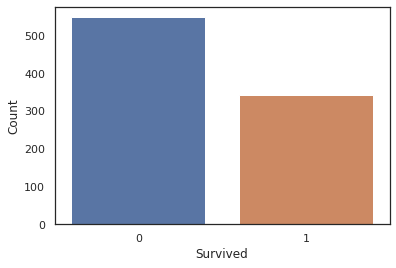

In [12]:
sns.barplot(x='Survived', y='Count', data=x)

#### So we can see train data has slighty less representation of Survived passengers but it is not highly skewed.

#### Explore the distribution of different categorical predictor variables

In [13]:
x = DataFrame(train_data['Pclass'].value_counts()).reset_index()
x.columns = ['Pclass', 'Count']
print(x)
print('----------------')

x = DataFrame(train_data['Sex'].value_counts()).reset_index()
x.columns = ['Sex', 'Count']
print(x)
print('----------------')

x = DataFrame(train_data['SibSp'].value_counts()).reset_index()
x.columns = ['SibSp', 'Count']
print(x)
print('----------------')

x = DataFrame(train_data['Parch'].value_counts()).reset_index()
x.columns = ['Parch', 'Count']
print(x)
print('----------------')

x = DataFrame(train_data['Embarked'].value_counts()).reset_index()
x.columns = ['Embarked', 'Count']
print(x)

   Pclass  Count
0       3    491
1       1    216
2       2    184
----------------
      Sex  Count
0    male    577
1  female    314
----------------
   SibSp  Count
0      0    608
1      1    209
2      2     28
3      4     18
4      3     16
5      8      7
6      5      5
----------------
   Parch  Count
0      0    678
1      1    118
2      2     80
3      5      5
4      3      5
5      4      4
6      6      1
----------------
  Embarked  Count
0        S    644
1        C    168
2        Q     77


#### So we can clearly see -

1. Maximum people are travelling in Pclass 3.
2. Maximum people are male.
3. Maximum people are travelling alone.
4. Maximum people have embarked from S.

#### Check if there is any row with Fare as Zero

In [14]:
train_data[train_data['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [15]:
train_data[train_data['Fare'] == 0].shape

(15, 12)

#### So there are 15 rows with Fare as Zero which we need to impute.

#### Check if there is any row with Age as Zero

In [16]:
train_data[train_data['Age'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### Let's see the distribution of 2 Numerical predictors - Age and Fare

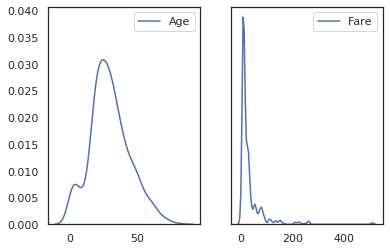

In [17]:
fig, (axis1, axis2) = plt.subplots(1, 2, sharey=True)

sns.kdeplot(data=train_data['Age'], ax=axis1)
sns.kdeplot(data=train_data['Fare'], ax=axis2)

Text(0.5, 1.0, 'Age')

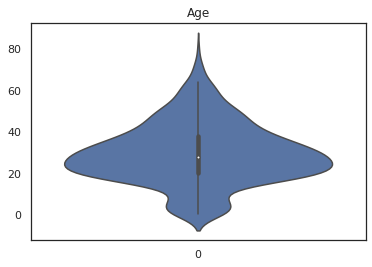

In [18]:
sns.violinplot(data=train_data['Age']).set_title('Age')

Text(0.5, 1.0, 'Fare')

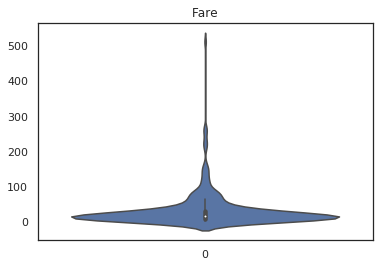

In [19]:
sns.violinplot(data=train_data['Fare']).set_title("Fare")

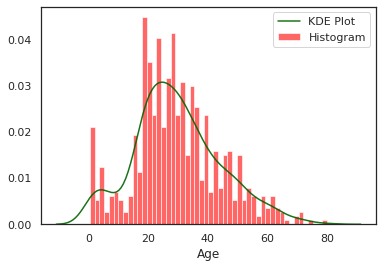

In [20]:
sns.distplot(train_data['Age'], bins=50,
            kde_kws ={'color': 'darkgreen', 'alpha': 0.9, 'label': 'KDE Plot'},
            hist_kws={'color': 'red', 'alpha': 0.6, 'label': 'Histogram'})

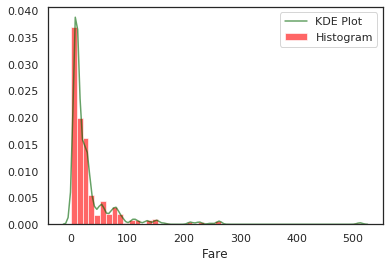

In [21]:
sns.distplot(train_data['Fare'], bins=50,
            kde_kws ={'color': 'darkgreen', 'alpha': 0.6, 'label': 'KDE Plot'},
            hist_kws={'color': 'red', 'alpha': 0.6, 'label': 'Histogram'})

#### So we can conclude that -
1. Distribution of Age is somewhat Normal and most people has age between 20 to 40.
2. Fare is highly skewed with Fare for most people is less than 10.

#### Next action item is to identify survival trend for different attribute and try to explore meaningful insights from the data.

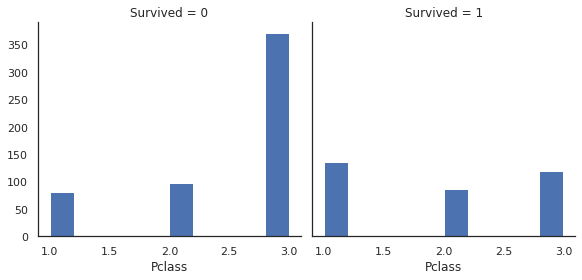

In [22]:
g = sns.FacetGrid(train_data, col="Survived", col_wrap=3,height=4)
g = (g.map(plt.hist, "Pclass"))

#### OBSERVATION: Pclass=3 has lowest survival rate.

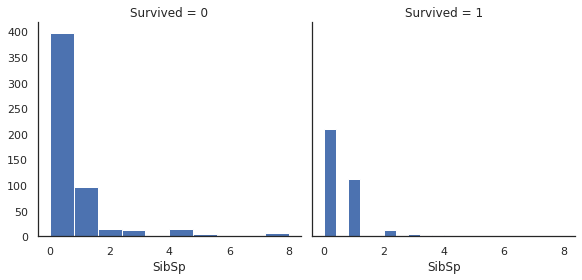

In [23]:
g = sns.FacetGrid(train_data, col="Survived", col_wrap=3,height=4)
g = (g.map(plt.hist, "SibSp"))

#### OBSERVATION: Sibsp does not provide any definite conclusion

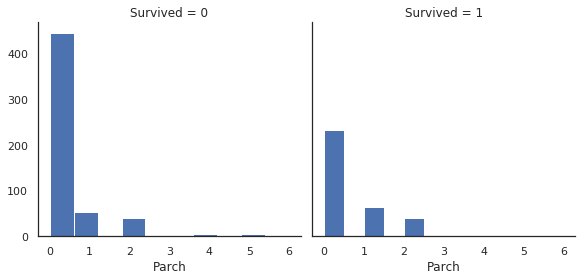

In [24]:
g = sns.FacetGrid(train_data, col="Survived", col_wrap=3,height=4)
g = (g.map(plt.hist, "Parch"))

#### OBSERVATION: Parch does not provide any definite conclusion

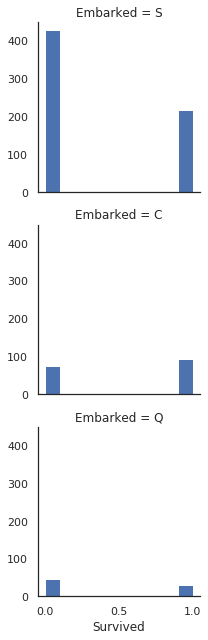

In [25]:
grid = sns.FacetGrid(train_data, row='Embarked')
grid.map(plt.hist, 'Survived')

#### OBSERVATION: Passengers embarked from S has lowest survival rate

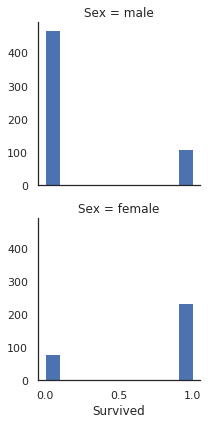

In [26]:
grid = sns.FacetGrid(train_data, row='Sex')
grid.map(plt.hist, 'Survived')

#### OBSERVATION: Females have high survival rate

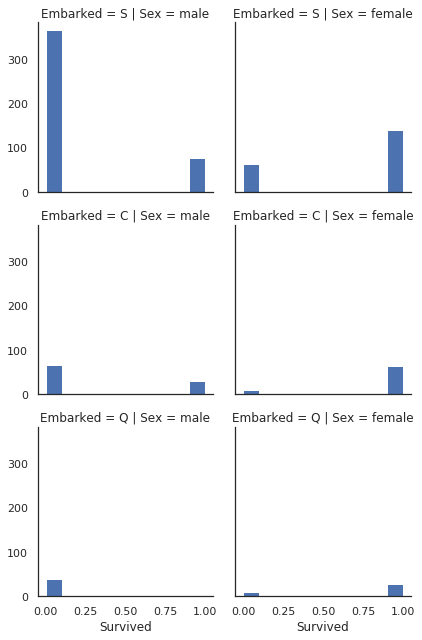

In [27]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Sex')
grid.map(plt.hist, 'Survived')

#### OBSERVATION: Sex is evidently the dominant factor of Survival

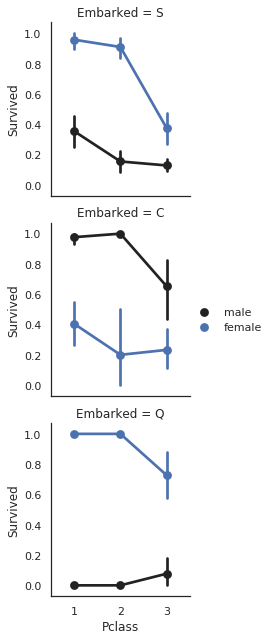

In [28]:
grid = sns.FacetGrid(train_data, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None)
grid.add_legend()

#### OBSERVATION: Embarked from Q Pclass 3 Male have high survival rate

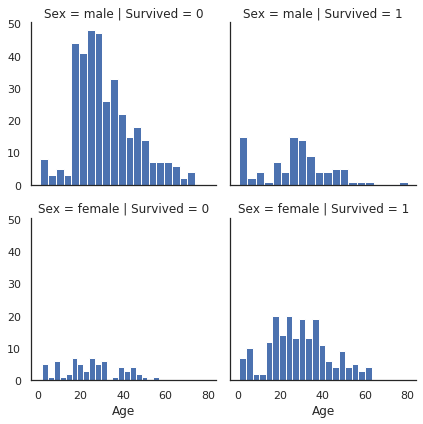

In [29]:
grid = sns.FacetGrid(train_data, row='Sex', col='Survived')
grid.map(plt.hist, 'Age', bins=20)

#### OBSERVATION: Age range 20-40 Female has high survival rate and Male has low survival rate

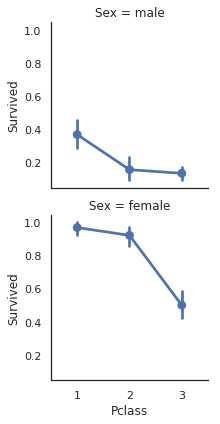

In [30]:
grid = sns.FacetGrid(train_data, row='Sex')
grid.map(sns.pointplot, 'Pclass', 'Survived', order=None, hue_order=None)
grid.add_legend()

#### OBSERVATION: There is a sharp dip in Survival rate of Pclass 3 females

#### Missing Value Imputation

#### For 'Embarked' we will replace missing values by most frequent character of this column andwe will remove 'Cabin' because it has too many Null values.

In [31]:
from sklearn.impute import SimpleImputer
char_imputer = SimpleImputer(strategy="most_frequent")
x = DataFrame(char_imputer.fit_transform(train_data[["Embarked"]]))
x.columns= ['Imputed_Embarked']

train_data = pd.concat([train_data, x], axis=1)
train_data = train_data.drop(['Cabin', 'Embarked'], axis=1)

In [33]:
train_data[['Sex', 'Age']].groupby(['Sex']).mean().sort_values('Age', ascending=False)

,Age
Sex,
male,30.726645
female,27.915709


In [34]:
train_data[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).mean().sort_values('Age', ascending=False)

Age
Pclass Sex              
1      male    41.281386
       female  34.611765
2      male    30.740707
       female  28.722973
3      male    26.507589
       female  21.750000

#### Since we can see there is some relation between mean age of passengers with their Pclass and Sex combination we will impute missing Ages using mean values of Pclass-Sex combination.

In [35]:
x = DataFrame(train_data[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).mean().reset_index())

for i in range(train_data.shape[0]):
    if np.isnan(train_data.loc[i, 'Age']):
        for j in range(0, 6):
            if train_data.loc[i, 'Sex'] == x.loc[j, 'Sex'] and train_data.loc[i, 'Pclass'] == x.loc[j, 'Pclass']:
                train_data.loc[i, 'Age'] = x.loc[j, 'Age']

In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               891 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Imputed_Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### So we can see there is no missing value in the train data.

#### Feature Engineering - Try to create some feature

#### Create a new column Family = SibSp + Parch

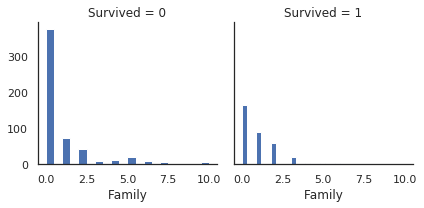

In [37]:
train_data['Family'] = train_data['SibSp'] + train_data['Parch']

grid = sns.FacetGrid(train_data, col='Survived')
grid.map(plt.hist, 'Family', bins=20)

#### Create a new column Age_Bin with Pandas qcut() method.

In [38]:
train_data['Age_Bin'] = pd.qcut(train_data['Age'], 10, labels=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"])
train_data['Age_Bin'] = train_data['Age_Bin'].astype(int)

In [39]:
train_data[['Sex', 'Age_Bin', 'Survived']].groupby(['Sex', 'Age_Bin']).mean().sort_values('Survived', ascending=False)

Survived
Sex    Age_Bin          
female 10       0.892857
       8        0.880952
       7        0.818182
       6        0.787879
       4        0.741935
       2        0.714286
       1        0.673469
       3        0.639344
       9        0.600000
male   1        0.431373
       7        0.250000
       8        0.207547
       6        0.203390
       10       0.196721
       9        0.177419
       4        0.157895
       2        0.137255
       5        0.095745
       3        0.060606

In [40]:
train_data[['Age_Bin', 'Survived']].groupby(['Age_Bin']).mean().sort_values('Survived', ascending=False)

,Survived
Age_Bin,
1,0.550000
8,0.505263
3,0.436170
10,0.415730
6,0.413043
7,0.410256
4,0.363636
2,0.341772
9,0.280488


#### Convert Categorical variable to Numeric

In [41]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1}).astype(int)
train_data['Imputed_Embarked'] = train_data['Imputed_Embarked'].map({'S': 0, 'Q': 1, 'C': 2}).astype(int)

#### Create a new column Pclass_Sex as Pclass ** 2 + Sex

In [42]:
train_data['Pclass_Sex'] = train_data['Pclass'] * train_data['Pclass'] + train_data['Sex']
train_data[['Pclass_Sex', 'Survived']].groupby('Pclass_Sex').mean().sort_values('Survived', ascending=False)

,Survived
Pclass_Sex,
2,0.968085
5,0.921053
10,0.500000
1,0.368852
4,0.157407
9,0.135447


#### Scale Fare and Age

In [43]:
from sklearn.preprocessing import StandardScaler
std_scaler_Fare = StandardScaler()
std_scaler_Age = StandardScaler()
train_data['Fare'] = std_scaler_Fare.fit_transform(train_data[['Fare']])
train_data['Age']  = std_scaler_Age.fit_transform(train_data[['Age']])

#### Create a new column 'Title' and converted it to Numeric.

In [44]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

train_data['Title'] = train_data['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}).astype(int)

train_data['Title'] = train_data['Title'].fillna(0)

In [45]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Imputed_Embarked,Family,Age_Bin,Pclass_Sex,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.551366,1,0,A/5 21171,-0.502445,0,1,3,9,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.654030,1,0,PC 17599,0.786845,2,1,8,2,3
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.250017,0,0,STON/O2. 3101282,-0.488854,0,0,4,10,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.428018,1,0,113803,0.420730,0,1,8,2,3
4,5,0,3,"Allen, Mr. William Henry",0,0.428018,0,0,373450,-0.486337,0,0,8,9,1


#### Prepare final data for model

In [46]:
train_data_model = train_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
train_data_label = train_data['Survived']

train_data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            891 non-null    int64  
 1   Sex               891 non-null    int64  
 2   Age               891 non-null    float64
 3   SibSp             891 non-null    int64  
 4   Parch             891 non-null    int64  
 5   Fare              891 non-null    float64
 6   Imputed_Embarked  891 non-null    int64  
 7   Family            891 non-null    int64  
 8   Age_Bin           891 non-null    int64  
 9   Pclass_Sex        891 non-null    int64  
 10  Title             891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


#### Fit data to the model

In [47]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [48]:
svc = SVC(random_state=42)
svc.fit(train_data_model, train_data_label)
acc_svc = round(svc.score(train_data_model, train_data_label) * 100, 2)
print(acc_svc)

82.83


In [49]:
perceptron = Perceptron(random_state=42)
perceptron.fit(train_data_model, train_data_label)
acc_perceptron = round(perceptron.score(train_data_model, train_data_label) * 100, 2)
print(acc_perceptron)

81.48


In [50]:
linear_svc = LinearSVC(random_state=42, max_iter=10000)
linear_svc.fit(train_data_model, train_data_label)
acc_linear_svc = round(linear_svc.score(train_data_model, train_data_label) * 100, 2)
print(acc_linear_svc)

81.26


In [51]:
sgd = SGDClassifier(random_state=42)
sgd.fit(train_data_model, train_data_label)
acc_sgd = round(sgd.score(train_data_model, train_data_label) * 100, 2)
print(acc_sgd)

69.14


In [52]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(train_data_model, train_data_label)
acc_decision_tree = round(decision_tree.score(train_data_model, train_data_label) * 100, 2)
print(acc_decision_tree)

98.43


In [53]:
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(train_data_model, train_data_label)
acc_random_forest = round(random_forest.score(train_data_model, train_data_label) * 100, 2)
print(acc_random_forest)

98.43


#### Since Random Forest is giving maximum accurancy we will use this model.

#### Cross Validation.

In [54]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
cv_score = cross_val_score(random_forest, train_data_model, train_data_label, cv=10, scoring='accuracy')

print("Mean Score     :", cv_score.mean())
print("Std Dev Score  :", cv_score.std())

Mean Score     : 0.8036454431960051
Std Dev Score  : 0.04179318837252479


#### Variable Importance.

In [55]:
importances = pd.DataFrame({'Feature':train_data_model.columns,'Importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Feature')
importances.head(15)

,Importance
Feature,
Fare,0.225
Title,0.186
Age,0.163
Sex,0.114
Age_Bin,0.068
Pclass_Sex,0.065
Family,0.056
Pclass,0.047
Imputed_Embarked,0.030


#### Since SibSp and Parch have less importance we will remove and train Random Forest again.

In [56]:
train_data_model = train_data_model.drop(['SibSp', 'Parch'], axis=1)

random_forest.fit(train_data_model, train_data_label)
acc_random_forest = round(random_forest.score(train_data_model, train_data_label) * 100, 2)
print(acc_random_forest)

98.43


In [57]:
cv_score = cross_val_score(random_forest, train_data_model, train_data_label, cv=10, scoring='accuracy')

print("Mean Score     :", cv_score.mean())
print("Std Dev Score  :", cv_score.std())

importances = pd.DataFrame({'Feature':train_data_model.columns,'Importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Feature')
importances.head(15)

Mean Score     : 0.8115230961298376
Std Dev Score  : 0.04878137331128236


,Importance
Feature,
Fare,0.231
Age,0.177
Sex,0.164
Title,0.136
Family,0.075
Age_Bin,0.069
Pclass,0.061
Pclass_Sex,0.058
Imputed_Embarked,0.029


#### Since Random Forest is giving maximum accuracy we will do a grid search on Random Forest.

In [58]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25], "min_samples_split" : [10, 12, 16, 18], "n_estimators": [100, 700, 1500]}
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

grid_search.fit(train_data_model, train_data_label)

grid_search.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 1500}

#### Use this best_params to train Random Forest.

In [59]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 16,   
                                       n_estimators=1500, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
random_forest.fit(train_data_model, train_data_label)
acc_random_forest = round(random_forest.score(train_data_model, train_data_label) * 100, 2)
print(acc_random_forest)
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

88.66
oob score: 83.28 %


In [60]:
cv_score = cross_val_score(random_forest, train_data_model, train_data_label, cv=10, scoring='accuracy')

print("Mean Score     :", cv_score.mean())
print("Std Dev Score  :", cv_score.std())

Mean Score     : 0.8395630461922596
Std Dev Score  : 0.05126301112291926


#### Understand different Metrics of the Model.

In [61]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, classification_report

train_label_predict = random_forest.predict(train_data_model)
print("Confusion Matrix: \n", confusion_matrix(train_data_label, train_label_predict))

print("Precision: ", precision_score(train_data_label, train_label_predict))
print("Recall   : ", recall_score(train_data_label, train_label_predict))
print("f1 Score : ", f1_score(train_data_label, train_label_predict))

Confusion Matrix: 
 [[521  28]
 [ 73 269]]
Precision:  0.9057239057239057
Recall   :  0.7865497076023392
f1 Score :  0.8419405320813771


In [62]:
print(classification_report(train_data_label, train_label_predict, target_names=['Not-Survived', 'Survived']))

              precision    recall  f1-score   support

Not-Survived       0.88      0.95      0.91       549
    Survived       0.91      0.79      0.84       342

    accuracy                           0.89       891
   macro avg       0.89      0.87      0.88       891
weighted avg       0.89      0.89      0.88       891



#### Precision-Recall Curve

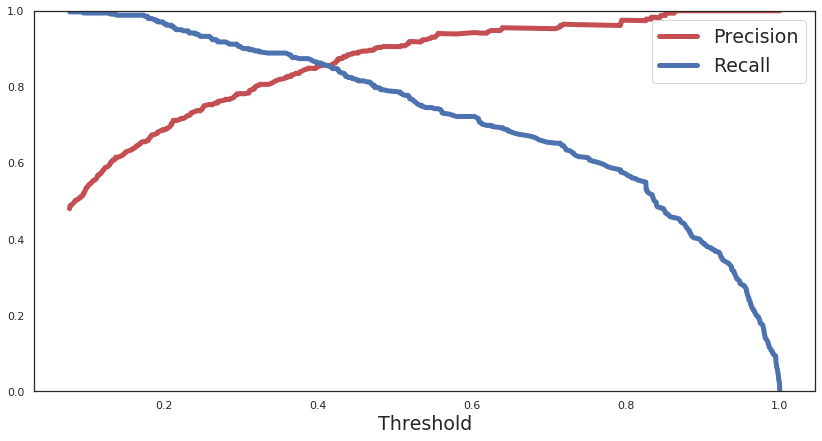

In [63]:
train_data_label_scores = random_forest.predict_proba(train_data_model)
train_data_label_scores = train_data_label_scores[:,1]

precision, recall, threshold = precision_recall_curve(train_data_label, train_data_label_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="Precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="Recall", linewidth=5)
    plt.xlabel("Threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

#### Precision Vs Recall

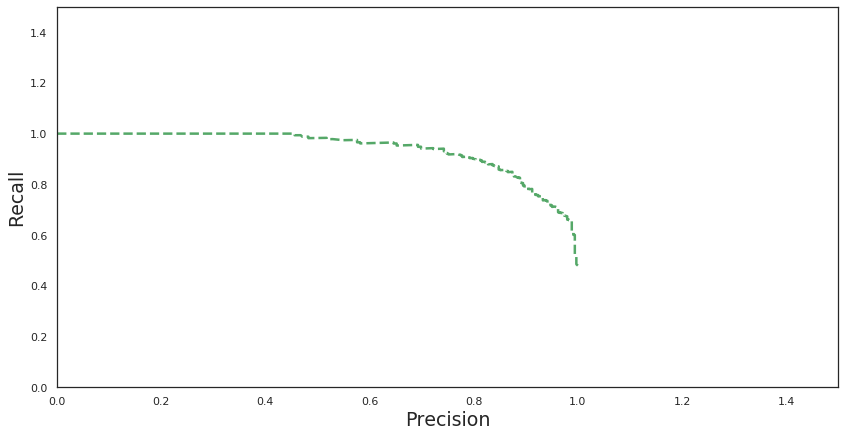

In [64]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("Recall", fontsize=19)
    plt.xlabel("Precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

#### ROC Curve

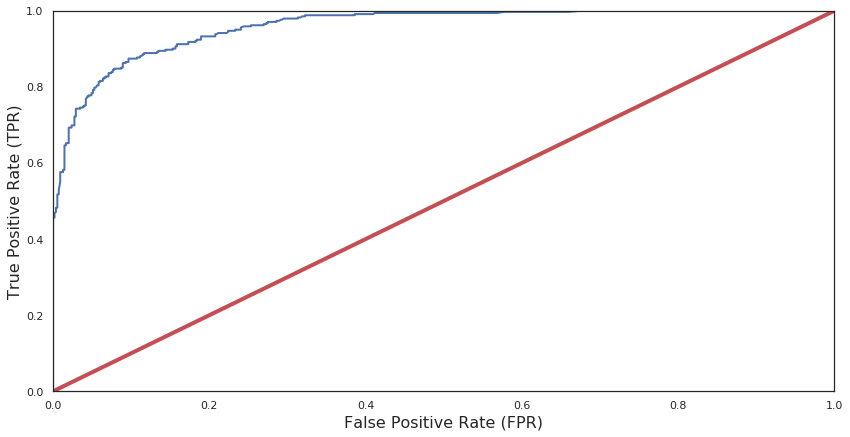

0.9584971079794203


In [65]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(train_data_label, train_data_label_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()
print(roc_auc_score(train_data_label, train_data_label_scores))

#### Since this is a Classification problem I am using 'Accuracy' as my Metric and Area-Under-Curve is also good. So I will now proceed towards applying this model on test dataset.

#### Apply data pre-processing on test data.

In [66]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### We can see there is missing value in 'Fare' column unlike train data; so for this we don't have any imputation strategy. Ideally we should have a strategy but for simplicity we will replace the missing value with minimum fare.

In [67]:
test_data[np.isnan(test_data['Fare'])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [68]:
min_fare = np.min(test_data['Fare'])

for i in range(test_data.shape[0]):
    if np.isnan(test_data.loc[i, 'Fare']):
        test_data.loc[i, 'Fare'] = min_fare

In [69]:
test_data[np.isnan(test_data['Fare'])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [70]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [71]:
x = DataFrame(char_imputer.transform(test_data[["Embarked"]]))
x.columns= ['Imputed_Embarked']

test_data = pd.concat([test_data, x], axis=1)

test_data = test_data.drop(['Cabin', 'Embarked'], axis=1)

x = DataFrame(test_data[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).mean().reset_index())

for i in range(test_data.shape[0]):
    if np.isnan(test_data.loc[i, 'Age']):
        for j in range(0, 6):
            if test_data.loc[i, 'Sex'] == x.loc[j, 'Sex'] and test_data.loc[i, 'Pclass'] == x.loc[j, 'Pclass']:
                test_data.loc[i, 'Age'] = x.loc[j, 'Age']

test_data['Family'] = test_data['SibSp'] + test_data['Parch']

test_data['Age_Bin'] = pd.qcut(test_data['Age'], 10, labels=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"])
test_data['Age_Bin'] = test_data['Age_Bin'].astype(int)

test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1}).astype(int)
test_data['Imputed_Embarked'] = test_data['Imputed_Embarked'].map({'S': 0, 'Q': 1, 'C': 2}).astype(int)

test_data['Pclass_Sex'] = test_data['Pclass'] * test_data['Pclass'] + test_data['Sex']

test_data['Fare'] = std_scaler_Fare.transform(test_data[['Fare']])
test_data['Age']  = std_scaler_Age.transform(test_data[['Age']])

test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')

test_data['Title'] = test_data['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}).astype(int)

test_data['Title'] = test_data['Title'].fillna(0)

## Prepare final data for model
test_data_model = test_data.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1)

In [72]:
test_data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            418 non-null    int64  
 1   Sex               418 non-null    int64  
 2   Age               418 non-null    float64
 3   Fare              418 non-null    float64
 4   Imputed_Embarked  418 non-null    int64  
 5   Family            418 non-null    int64  
 6   Age_Bin           418 non-null    int64  
 7   Pclass_Sex        418 non-null    int64  
 8   Title             418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [73]:
test_data_predictions = random_forest.predict(test_data_model)
pred = DataFrame(test_data_predictions)
pred.columns = ['Survived']
predictions = pd.concat([test_data['PassengerId'], pred], axis=1)
predictions.to_csv("Submission_RF.csv", index=False)

#### Now let's try to apply Artificial Neural Network to see how it goes.

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [75]:
classifier = Sequential([Dense(128, activation='relu', input_shape=(train_data_model.shape[1], )),
                         Dropout(rate=0.1),
                         Dense(64, activation='relu'),
                         Dropout(rate=0.1),
                         Dense(1, activation='sigmoid')])

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])
classifier.fit(train_data_model, train_data_label,
                    batch_size=20,
                    epochs=20)

Train on 891 samples
Epoch 1/20
891/891 [==============================] - 1s 691us/sample - loss: 0.6139 - Accuracy: 0.0000e+00
Epoch 2/20
891/891 [==============================] - 0s 84us/sample - loss: 0.5133 - Accuracy: 0.0000e+00
Epoch 3/20
891/891 [==============================] - 0s 80us/sample - loss: 0.4819 - Accuracy: 0.0000e+00
Epoch 4/20
891/891 [==============================] - 0s 80us/sample - loss: 0.4655 - Accuracy: 0.0000e+00
Epoch 5/20
891/891 [==============================] - 0s 79us/sample - loss: 0.4517 - Accuracy: 0.0000e+00
Epoch 6/20
891/891 [==============================] - 0s 77us/sample - loss: 0.4471 - Accuracy: 0.0000e+00
Epoch 7/20
891/891 [==============================] - 0s 79us/sample - loss: 0.4379 - Accuracy: 0.0000e+00
Epoch 8/20
891/891 [==============================] - 0s 79us/sample - loss: 0.4339 - Accuracy: 0.0000e+00
Epoch 9/20
891/891 [==============================] - 0s 80us/sample - loss: 0.4131 - Accuracy: 0.0000e+00
Epoch 10/20
891

In [76]:
test_data_predictions = classifier.predict(test_data_model)
pred = DataFrame(test_data_predictions)
pred.columns = ['Survived']
predictions = pd.concat([test_data['PassengerId'], pred], axis=1)
predictions.to_csv("Submission_ANN.csv", index=False)